# Welcome to our stock prediction notebook!
# In this notebook we are trying to predict closing price of the DJIA stock using the last 59 stock data and the opening price of the day from Yahoo Finance, and also the top 25 rated news of the current day from Reddit WorldNews Channel.

# The matirials for this project was taken from kaggle: https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv
 
# In the next cell we are importing the libraries that we using in this project to manipulate the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# In the next cell we importing the data from our github project: https://github.com/Eliot100/DJIA-stock-project

In [2]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

# In the cell below we copying the stock data, and normalize it.

In [3]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


# In the cell below we recognize the data. Every line contains stock data of 60 days in a row, the date of the stock data last day and top 25 rated news this day.

In [4]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [5]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

# In the two cells below we importing the library nltk and through it we convert the news to numerical value between 1 to -1 according to how much is good or bad.

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# In the cell below we divide the data to training, testing, x and y. for the learning processes



In [8]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']
rowsSize = X_df.shape[0]
test_size = 0.2
train_rowsSize = rowsSize*(1-test_size)
test_rowsSize = rowsSize*test_size
x_train, x_test, y_train, y_test = (X_df.tail(int(train_rowsSize)), X_df.head(int(test_rowsSize)), Y_df.tail(int(train_rowsSize)), Y_df.head(int(test_rowsSize)))
data_x_train = x_train.copy()
data_y_train = np.array(y_train.copy(), ndmin=2).reshape((y_train.shape[0], 1))
data_x_test = x_test.copy()
data_y_test = np.array(y_test.copy(), ndmin=2).reshape((y_test.shape[0], 1))
data_test_dates = df_Combined2['Date'].head(int(test_rowsSize))
opening_price_test = data_x_test.copy()['Open']

# In the cell below we importing the libraries that creating ours models, visualize ours results and displaying the time it took to train the models.

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  
import matplotlib.pyplot as plt
%matplotlib inline
import time
from google.colab import drive
drive.mount('/content/gdrive/')
saver = tf.train.Saver()

Instructions for updating:
non-resource variables are not supported in the long term


# In the cells below we:
# 1) prepering our linear-regresion model
# 2) training our linear-regresion model
# 3) displaying the mean squared error progress graph
# 4) displaying the results of our linear-regresion model with the real testing values.

In [49]:
start_time = time.time()
features = x_train.shape[1]
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [53]:
train_losses = []
test_losses = []
temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
i = 0
print('iter:', i,', loss:', temp_loss)
while(True):
    sess.run(update, feed_dict = {x:data_x_train, y_:data_y_train})
    i += 1
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i,', loss:', temp_loss)
    if (i > 5):
      if (test_losses[-2] - test_losses[-1] < 0):
        break

iter: 0 , loss: 0.13720682
iter: 1 , loss: 0.13371052
iter: 2 , loss: 0.13030636
iter: 3 , loss: 0.12699197
iter: 4 , loss: 0.12376503
iter: 5 , loss: 0.120623305
iter: 6 , loss: 0.117564544
iter: 7 , loss: 0.11458669
iter: 8 , loss: 0.111687616
iter: 9 , loss: 0.10886528
iter: 10 , loss: 0.106117755
iter: 11 , loss: 0.103443086
iter: 12 , loss: 0.10083938
iter: 13 , loss: 0.098304816
iter: 14 , loss: 0.09583764
iter: 15 , loss: 0.093436055
iter: 16 , loss: 0.09109843
iter: 17 , loss: 0.08882309
iter: 18 , loss: 0.086608395
iter: 19 , loss: 0.084452815
iter: 20 , loss: 0.082354784
iter: 21 , loss: 0.080312856
iter: 22 , loss: 0.07832554
iter: 23 , loss: 0.07639144
iter: 24 , loss: 0.07450922
iter: 25 , loss: 0.07267744
iter: 26 , loss: 0.07089488
iter: 27 , loss: 0.06916021
iter: 28 , loss: 0.06747219
iter: 29 , loss: 0.065829664
iter: 30 , loss: 0.064231366
iter: 31 , loss: 0.06267621
iter: 32 , loss: 0.061163068
iter: 33 , loss: 0.059690822
iter: 34 , loss: 0.058258403
iter: 35 , los

KeyboardInterrupt: ignored

In [ ]:
 print("linear regrression training time:' %s seconds " % (time.time() - start_time))

get to model :linear regrression training :' 41.875102519989014 seconds 


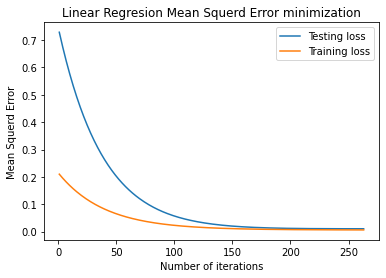

In [ ]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Linear Regresion Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

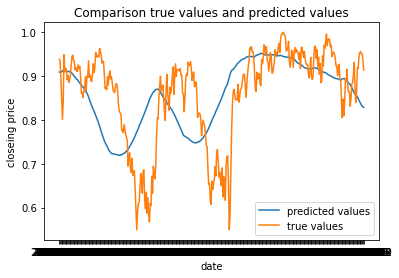

In [ ]:
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
predicted_values = sess.run(y, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()

In [ ]:
saver.save(sess, "gdrive/My Drive/LR.ckpt") 

In [110]:
start_time = time.time()
step_size = 0.02
(hidden1_size, hidden2_size) = (300, 1)

minVal=-0.0001
maxVal=0.0001

x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random.uniform(shape=[x_train.shape[1], hidden1_size], minval=minVal, maxval=maxVal))
b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))

predict = tf.matmul(z1,W2) + b2

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
test_losses = []
sess.run(init)
i = 0

In [111]:
while(True):
  for _ in range(10):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
  if((test_losses[-2] - test_losses[-1] < 0)):
    break

print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 1 , loss: 0.73411924
iter: 2 , loss: 0.72487587
iter: 3 , loss: 0.71817446
iter: 4 , loss: 0.71067566
iter: 5 , loss: 0.69017315
iter: 6 , loss: 0.6054668
iter: 7 , loss: 0.34401378
iter: 8 , loss: 0.072527
iter: 9 , loss: 0.0150758345
iter: 10 , loss: 0.010379968
iter: 11 , loss: 0.010203287
iter: 12 , loss: 0.010213878
iter: 13 , loss: 0.010143428
iter: 14 , loss: 0.01005833
iter: 15 , loss: 0.009984744
iter: 16 , loss: 0.00992443
iter: 17 , loss: 0.0098741045
iter: 18 , loss: 0.009830909
iter: 19 , loss: 0.009793004
iter: 20 , loss: 0.009759282
iter: 21 , loss: 0.00972897
iter: 22 , loss: 0.009701669
iter: 23 , loss: 0.009677343
iter: 24 , loss: 0.009655231
iter: 25 , loss: 0.009635387
iter: 26 , loss: 0.009617549
iter: 27 , loss: 0.009601856
iter: 28 , loss: 0.009588285
iter: 29 , loss: 0.009575879
iter: 30 , loss: 0.009564828
iter: 31 , loss: 0.00955471
iter: 32 , loss: 0.009544438
iter: 33 , loss: 0.009533851
iter: 34 , loss: 0.009522734
iter: 35 , loss: 0.009510991
iter: 3

In [112]:
saver.save(sess, "gdrive/My Drive/NN 1 hidden layer.ckpt")  

'gdrive/My Drive/NN 1 hidden layer.ckpt'

In [113]:
step_size = 0.01
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
minTestLoss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
while(True):
  for _ in range(10):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
  if((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)):
    break
  if(temp_loss < minTestLoss):
    minTestLoss = temp_loss
    saver.save(sess, "gdrive/My Drive/NN 1 hidden layer.ckpt") 
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 4561 , loss: 0.001358545
iter: 4562 , loss: 0.0013585222
iter: 4563 , loss: 0.0013585184
iter: 4564 , loss: 0.0013584673
iter: 4565 , loss: 0.0013584103
iter: 4566 , loss: 0.0013583846
iter: 4567 , loss: 0.0013583619
iter: 4568 , loss: 0.0013583023
iter: 4569 , loss: 0.0013582644
iter: 4570 , loss: 0.0013582668
iter: 4571 , loss: 0.0013581958
iter: 4572 , loss: 0.0013581566
iter: 4573 , loss: 0.0013581057
iter: 4574 , loss: 0.0013581122
iter: 4575 , loss: 0.0013580635
iter: 4576 , loss: 0.0013579995
iter: 4577 , loss: 0.0013579638
iter: 4578 , loss: 0.0013579425
iter: 4579 , loss: 0.0013579252
iter: 4580 , loss: 0.0013578432
iter: 4581 , loss: 0.001357828
iter: 4582 , loss: 0.00135778
iter: 4583 , loss: 0.0013577342
iter: 4584 , loss: 0.0013577504
iter: 4585 , loss: 0.0013576695
iter: 4586 , loss: 0.001357653
iter: 4587 , loss: 0.001357595
iter: 4588 , loss: 0.0013575716
iter: 4589 , loss: 0.0013575238
iter: 4590 , loss: 0.0013574921
iter: 4591 , loss: 0.0013574606
iter: 4592 , l

KeyboardInterrupt: ignored

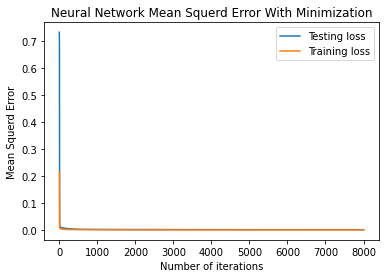

In [114]:
# Visualize data to graph  
iter = np.arange(1,len(test_losses)+1)
plt.title('Neural Network Mean Squerd Error With Minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

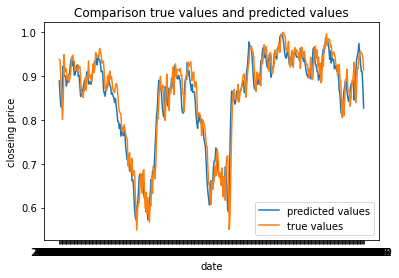

In [115]:
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()

In [116]:
weight = sess.run(W1)
baieses = sess.run(b1)

In [117]:
step_size = 0.02
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 50, 10, 1, 1 )

minVal=-0.0001
maxVal=0.0001

x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(weight)
b1 = tf.Variable(baieses)
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal, maxval=maxVal))
b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal, maxval=maxVal))
# z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

# W5 = tf.Variable(tf.random.uniform([hidden4_size, hidden5_size], minval=minVal, maxval=maxVal))
# b5 = tf.Variable(tf.random.uniform(shape=[hidden5_size], minval=minVal, maxval=maxVal))
# z5 = tf.nn.relu(tf.matmul(z4,W5)+b5)

# W6 = tf.Variable(tf.random.uniform([hidden5_size, 1], minval=minVal, maxval=maxVal))
# b6 = tf.Variable(tf.random.uniform(shape=[1], minval=minVal, maxval=maxVal))

predict = tf.matmul(z3,W4) + b4

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
test_losses = []
sess.run(init)
saver.restore(sess, "gdrive/My Drive/NN 1 hidden layer.ckpt")
weights = sess.run(W1)
baieses = sess.run(b1)

INFO:tensorflow:Restoring parameters from gdrive/My Drive/NN 1 hidden layer.ckpt


In [121]:
step_size = 0.1
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 50, 10, 1, 1 )

for _ in [1,2]:
  minVal=-0.0001
  maxVal=0.0001

  x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 1])

  W1 = tf.constant(weights)
  b1 = tf.constant(baieses)
  z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
  W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
  b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
  z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  z3 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  W4 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  b4 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  predict = tf.matmul(z3,W4) + b4
  loss = tf.reduce_mean(tf.pow(predict - y_, 2))
  train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
  init = tf.global_variables_initializer()
  sess = tf.Session()
  train_losses = []
  test_losses = []
  sess.run(init)
  i = 0
while(True):
  for _ in range(3):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
  if((test_losses[-2] - test_losses[-1] <= 0) and (test_losses[-3] - test_losses[-2] <= 0)):
    break

iter: 1 , loss: 0.739809
iter: 2 , loss: 0.73323673
iter: 3 , loss: 0.72799575
iter: 4 , loss: 0.72381276
iter: 5 , loss: 0.72047216
iter: 6 , loss: 0.7178028
iter: 7 , loss: 0.71566904
iter: 8 , loss: 0.7139626
iter: 9 , loss: 0.7125978
iter: 10 , loss: 0.7115054
iter: 11 , loss: 0.7106313
iter: 12 , loss: 0.7099315
iter: 13 , loss: 0.709371
iter: 14 , loss: 0.7089215
iter: 15 , loss: 0.708561
iter: 16 , loss: 0.70827115
iter: 17 , loss: 0.70803744
iter: 18 , loss: 0.7078479
iter: 19 , loss: 0.70769274
iter: 20 , loss: 0.7075638
iter: 21 , loss: 0.707454
iter: 22 , loss: 0.70735675
iter: 23 , loss: 0.7072655
iter: 24 , loss: 0.707174
iter: 25 , loss: 0.70707464
iter: 26 , loss: 0.70695835
iter: 27 , loss: 0.706813
iter: 28 , loss: 0.7066238
iter: 29 , loss: 0.7063696
iter: 30 , loss: 0.7060212
iter: 31 , loss: 0.7055386
iter: 32 , loss: 0.7048657
iter: 33 , loss: 0.7039243
iter: 34 , loss: 0.7026051
iter: 35 , loss: 0.70075643
iter: 36 , loss: 0.6981673
iter: 37 , loss: 0.69454783
ite

In [122]:
W1 = tf.Variable(weights)
b1 = tf.Variable(baieses)
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(sess.run(W2))
b2 = tf.Variable(sess.run(b2))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(sess.run(W3))
b3 = tf.Variable(sess.run(b3))
predict = tf.matmul(z2,W3) + b3
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
step_size = 0.001

In [124]:
while(True):
  for _ in range(50):
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
  train_losses.append(temp_loss)
  temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
  test_losses.append(temp_loss)
  print('iter:', i+1,', loss:', temp_loss)
  i += 1
  if((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)): 
    break
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 65 , loss: 0.0056806714
iter: 66 , loss: 0.0054101725
iter: 67 , loss: 0.00518291
iter: 68 , loss: 0.004965371
iter: 69 , loss: 0.0047539505
iter: 70 , loss: 0.0045511276
iter: 71 , loss: 0.004358567
iter: 72 , loss: 0.004176311
iter: 73 , loss: 0.0040044594
iter: 74 , loss: 0.00384321
iter: 75 , loss: 0.003692414
iter: 76 , loss: 0.0035523195
iter: 77 , loss: 0.003422296
iter: 78 , loss: 0.0033014233
iter: 79 , loss: 0.0031884455
iter: 80 , loss: 0.0030828456
iter: 81 , loss: 0.0029858428
iter: 82 , loss: 0.002896318
iter: 83 , loss: 0.002811325
iter: 84 , loss: 0.0027312257
iter: 85 , loss: 0.0026563434
iter: 86 , loss: 0.0025908723
iter: 87 , loss: 0.0025332125
iter: 88 , loss: 0.0024806375
iter: 89 , loss: 0.0024328658
iter: 90 , loss: 0.002388976
iter: 91 , loss: 0.0023484023
iter: 92 , loss: 0.0023110486
iter: 93 , loss: 0.0022760644
iter: 94 , loss: 0.0022431044
iter: 95 , loss: 0.0022120818
iter: 96 , loss: 0.002182709
iter: 97 , loss: 0.0021555505
iter: 98 , loss: 0.0021

KeyboardInterrupt: ignored

In [125]:
step_size = 0.00001
while(True):
  for _ in range(50):
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
  train_losses.append(temp_loss)
  temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
  test_losses.append(temp_loss)
  print('iter:', i+1,', loss:', temp_loss)
  i += 1
  if((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)): 
    break
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 182 , loss: 0.0014706458
iter: 183 , loss: 0.0014695106
iter: 184 , loss: 0.0014684228
iter: 185 , loss: 0.0014673676
iter: 186 , loss: 0.0014663334
iter: 187 , loss: 0.0014653374
iter: 188 , loss: 0.001464351
iter: 189 , loss: 0.001463347
iter: 190 , loss: 0.0014626237
iter: 191 , loss: 0.0014619123
iter: 192 , loss: 0.0014612166
iter: 193 , loss: 0.0014605253
iter: 194 , loss: 0.0014598327
iter: 195 , loss: 0.0014591807
iter: 196 , loss: 0.0014585183
iter: 197 , loss: 0.0014578745
iter: 198 , loss: 0.0014572496
iter: 199 , loss: 0.0014566352
iter: 200 , loss: 0.0014560298
iter: 201 , loss: 0.0014553855
iter: 202 , loss: 0.0014547773
iter: 203 , loss: 0.001454194
iter: 204 , loss: 0.0014536273
iter: 205 , loss: 0.0014531073
iter: 206 , loss: 0.0014525728
iter: 207 , loss: 0.0014520499
iter: 208 , loss: 0.0014515164
iter: 209 , loss: 0.0014510026
iter: 210 , loss: 0.0014505301
iter: 211 , loss: 0.0014500681
iter: 212 , loss: 0.0014495609
iter: 213 , loss: 0.001449009
iter: 214 , 

In [126]:
saver.save(sess, "gdrive/My Drive/NN 3 hidden layer.ckpt")

'gdrive/My Drive/NN 3 hidden layer.ckpt'

In [106]:
# start_time = time.time()
# step_size = 0.05
# (hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 30, 10, 1, 1 )

# minVal=-0.01
# maxVal=0.01
# minVal2=-0.1
# maxVal2=0.1

# x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
# y_ = tf.placeholder(tf.float32, shape=[None, 1])

# W1 = tf.Variable(tf.random.uniform(shape=[x_train.shape[1], hidden1_size], minval=minVal, maxval=maxVal))
# b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
# z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

# W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal2, maxval=maxVal2))
# b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal2, maxval=maxVal2))
# z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

# W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal2, maxval=maxVal2))
# b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal2, maxval=maxVal2))
# z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

# W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal2, maxval=maxVal2))
# b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal2, maxval=maxVal2))
# predict = tf.matmul(z3,W4) + b4
# loss = tf.reduce_mean(tf.pow(predict - y_, 2))
# train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
# init = tf.global_variables_initializer()
# sess = tf.Session()
# train_losses = []
# test_losses = []
# sess.run(init)
# i = 0
# for _ in range(40):
#   for _ in range(50):
#     sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})

#   temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
#   train_losses.append(temp_loss)
#   temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
#   test_losses.append(temp_loss)
#   print('iter:', i+1,', loss:', temp_loss)
#   i += 1
# saver.save(sess, "gdrive/My Drive/NN 3 hidden layer.ckpt")

iter: 1 , loss: 0.033137128
iter: 2 , loss: 0.011597642
iter: 3 , loss: 0.009554227
iter: 4 , loss: 0.009175226
iter: 5 , loss: 0.00882929
iter: 6 , loss: 0.008476696
iter: 7 , loss: 0.008173622
iter: 8 , loss: 0.007896277
iter: 9 , loss: 0.0076354584
iter: 10 , loss: 0.0073878607
iter: 11 , loss: 0.0071521755
iter: 12 , loss: 0.0069264784
iter: 13 , loss: 0.006711739
iter: 14 , loss: 0.0065086335
iter: 15 , loss: 0.0063135372
iter: 16 , loss: 0.0061284923
iter: 17 , loss: 0.0059580025
iter: 18 , loss: 0.0058016866
iter: 19 , loss: 0.0056542256
iter: 20 , loss: 0.005515609
iter: 21 , loss: 0.005383
iter: 22 , loss: 0.0052544693
iter: 23 , loss: 0.0051295455
iter: 24 , loss: 0.0050090933
iter: 25 , loss: 0.0048972536
iter: 26 , loss: 0.0047925557
iter: 27 , loss: 0.0046921987
iter: 28 , loss: 0.0045982255
iter: 29 , loss: 0.0045103133
iter: 30 , loss: 0.0044279974
iter: 31 , loss: 0.0043510627
iter: 32 , loss: 0.0042804144
iter: 33 , loss: 0.004214649
iter: 34 , loss: 0.004153967
iter: 

In [108]:
saver.restore(sess, "gdrive/My Drive/NN 3 hidden layer.ckpt")
step_size = 0.01
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
minTestLoss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
while(True):
  for _ in range(3):
    for _ in range(20):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
  if (temp_loss < minTestLoss):
    minTestLoss = temp_loss
    saver.save(sess, "gdrive/My Drive/NN 3 hidden layer.ckpt") 
  if((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)):
    break

INFO:tensorflow:Restoring parameters from gdrive/My Drive/NN 3 hidden layer.ckpt
iter: 41 , loss: 0.0038416982
iter: 42 , loss: 0.0038375647
iter: 43 , loss: 0.0038335407
iter: 44 , loss: 0.003829583
iter: 45 , loss: 0.0038256315
iter: 46 , loss: 0.0038216482
iter: 47 , loss: 0.003817704
iter: 48 , loss: 0.0038138067
iter: 49 , loss: 0.0038100246
iter: 50 , loss: 0.003806308
iter: 51 , loss: 0.0038027794
iter: 52 , loss: 0.00379934
iter: 53 , loss: 0.0037958904
iter: 54 , loss: 0.0037923467
iter: 55 , loss: 0.0037888263
iter: 56 , loss: 0.0037853029
iter: 57 , loss: 0.0037817615
iter: 58 , loss: 0.0037782663
iter: 59 , loss: 0.003774766
iter: 60 , loss: 0.0037712695
iter: 61 , loss: 0.0037678075
iter: 62 , loss: 0.0037642792
iter: 63 , loss: 0.00376072
iter: 64 , loss: 0.0037571583
iter: 65 , loss: 0.0037536046
iter: 66 , loss: 0.003750103
iter: 67 , loss: 0.0037466006
iter: 68 , loss: 0.0037432401
iter: 69 , loss: 0.0037398261
iter: 70 , loss: 0.0037363248
iter: 71 , loss: 0.003732842

KeyboardInterrupt: ignored

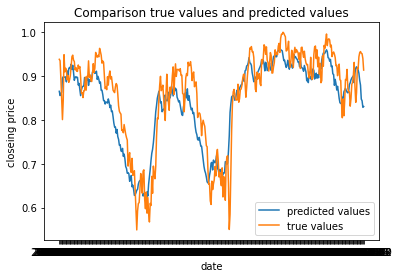

In [109]:
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()